In [66]:
import pandas as pd

dados = pd.read_csv("data/primeira_pesq.csv")
dados.head()

,ID,User,UserLocation,TweetText,Sentiment
0,0,forumpandlr,Contato: contato@pandlr.com,Só foi o Lula voltar que o RBD voltou também 😭,0
1,1,Biakicis,NaN,O STF praticamente fechou o Congresso que se t...,0
2,2,updatecharts,Brasil,"🚨 Em 13 dias, Lula assumirá a presidência do B...",0
3,3,FantasmadoComu6,NaN,Kkkkkkkkkkkkkkkkkkkkkkkkk essa Madeleine deve...,0
4,4,resendeju684,NaN,tá indo buscar suas trouxas e vcs vão pro inf...,0


In [67]:
dados.shape

(94, 5)

In [68]:
dados = dados.drop(columns=['ID', 'User', 'UserLocation'])

In [69]:
dados.head()

,TweetText,Sentiment
0,Só foi o Lula voltar que o RBD voltou também 😭,0
1,O STF praticamente fechou o Congresso que se t...,0
2,"🚨 Em 13 dias, Lula assumirá a presidência do B...",0
3,Kkkkkkkkkkkkkkkkkkkkkkkkk essa Madeleine deve...,0
4,tá indo buscar suas trouxas e vcs vão pro inf...,0


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(dados)
pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names()
)

/home/khrir/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Sentiment,TweetText
0,0.0,1.0
1,1.0,0.0


In [71]:
dados.shape

(94, 2)

In [72]:
dados.query('Sentiment == 0')

,TweetText,Sentiment
0,Só foi o Lula voltar que o RBD voltou também 😭,0
1,O STF praticamente fechou o Congresso que se t...,0
2,"🚨 Em 13 dias, Lula assumirá a presidência do B...",0
3,Kkkkkkkkkkkkkkkkkkkkkkkkk essa Madeleine deve...,0
4,tá indo buscar suas trouxas e vcs vão pro inf...,0
...,...,...
88,"Por aí se especula Que o 13 nos dá sorte E dá,...",0
89,Gilmar decide que recursos do Bolsa Família es...,0
90,Toda vez que alguém fala que o lula é musiquer...,0
91,CONGRESSO CANCELADO Em mais uma decisão estrit...,0


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


regressao_logistica = LogisticRegression(solver = "newton-cg")
tfidf_bruto = tfidf.fit_transform(dados["TweetText"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              dados["Sentiment"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.9583333333333334


In [74]:
pd.DataFrame.sparse.from_spmatrix(tfidf_bruto, columns=tfidf.get_feature_names_out())

,13,Bolsonaro,Brasil,Ele,LULA,Lira,Lula,STF,ao,com,...,ser,sua,também,tem,todos,tudo,um,uma,vai,você
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.208013,0.000000,0.00000,0.000000,...,0.0,0.000000,0.647306,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.154884,0.399280,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.583238,0.0,0.480747,0.0,0.0,0.0,0.171437,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.159582,0.000000,0.00000,0.352099,...,0.0,0.000000,0.496595,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.412810,0.000000,0.00000,0.910817,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.000000,0.0,0.000000,0.0,0.0,0.0,0.182982,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
90,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.313425,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
91,0.000000,0.0,0.000000,0.0,0.0,0.0,0.121751,0.313865,0.35248,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.298838,0.341416,0.000000,0.0
92,0.000000,0.0,0.000000,0.0,0.0,0.0,0.353411,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.935468,0.0


In [75]:
from nltk import ngrams
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(dados['TweetText'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              dados['Sentiment'],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.9583333333333334


In [76]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)

pesos.nlargest(50,0)

/home/khrir/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
de,0.253338
Câmara,0.221402
Câmara Senado,0.221402
Estão,0.221402
Estão todos,0.221402
FACILIDADE,0.221402
FACILIDADE de,0.221402
Logo STF,0.221402
PODERES,0.221402
PODERES Câmara,0.221402


In [77]:
%matplotlib inline

from wordcloud import WordCloud

todos_palavras = ' '.join([texto for texto in dados["TweetText"]])

In [79]:
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)
                          

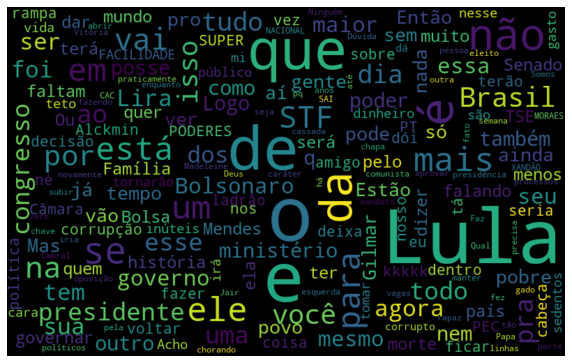

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

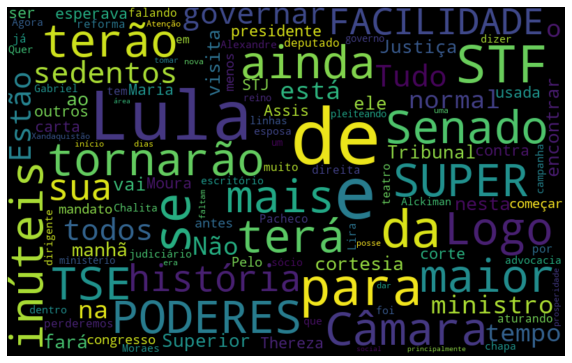

In [81]:
def nuvem_palavras_pos():
  palavras_pos = ' '.join([texto for texto in dados.query('Sentiment == 1')['TweetText']])
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                            collocations=False).generate(palavras_pos)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()
nuvem_palavras_pos()

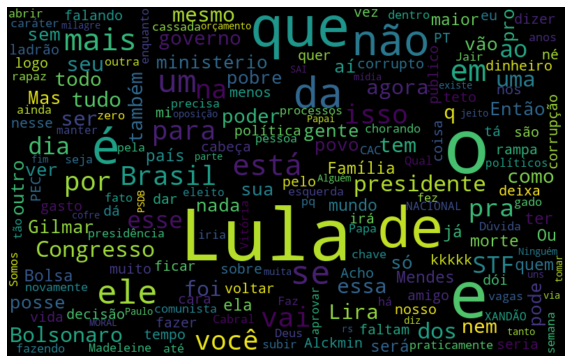

In [82]:
def nuvem_palavras_neg():
  palavras_neg = ' '.join([texto for texto in dados.query('Sentiment == 0')['TweetText']])
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                            collocations=False).generate(palavras_neg)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()
nuvem_palavras_neg()

In [83]:
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()


In [84]:
import nltk

todas_palavras = ' '.join([texto for texto in dados["TweetText"]])
frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequência": list(frequencia.values())})


In [85]:
df_frequencia.head()


,Palavra,Frequência
0,Só,2
1,foi,8
2,o,79
3,Lula,62
4,voltar,3


In [86]:
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 10)
df_frequencia

,Palavra,Frequência
2,o,79
40,e,72
3,Lula,62
45,de,56
5,que,49
31,a,47
24,do,45
128,é,32
72,da,27
80,não,27


In [87]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/khrir/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/khrir/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/khrir/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/khrir/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/khrir/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /home/khrir/nltk_data

True

In [88]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
palavras_irrelevantes[0:20]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele']

In [89]:
len(palavras_irrelevantes)

207

In [90]:
# !pip install unidecode


from unidecode import unidecode

dados['TweetText'] = [unidecode(frase) for frase in dados['TweetText']]
dados.head()

,TweetText,Sentiment
0,So foi o Lula voltar que o RBD voltou tambem,0
1,O STF praticamente fechou o Congresso que se t...,0
2,"Em 13 dias, Lula assumira a presidencia do Br...",0
3,Kkkkkkkkkkkkkkkkkkkkkkkkk essa Madeleine deve...,0
4,ta indo buscar suas trouxas e vcs vao pro inf...,0


In [91]:
palavras_irrelevantes = [unidecode(frase) for frase in palavras_irrelevantes]

In [92]:
#palavras_irrelevantes += ['http', 'https', 'vc', 'eh', 't', 'tou', 'to', 'ta', 'pra', 'qu', 'voc', 'ess', 'iss', ':/', 'minh']

In [93]:
from string import punctuation

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [94]:
palavras_irrelevantes += list(punctuation)

In [95]:
palavras_irrelevantes

['a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja',
 'hajam',
 'hajamos',
 'hao',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houvera',
 'houveram',
 'houveramos',
 'houverao',
 'houverei',
 'houverem',
 'hou

In [96]:
stemmer = nltk.RSLPStemmer()

#palavras_irrelevantes = [stemmer.stem(palavra) for palavra in palavras_irrelevantes]

In [97]:


token_pontuacao = tokenize.WordPunctTokenizer()

frase_processada = list()
for frase in dados["TweetText"]:
    nova_frase = list()
    frase = frase.lower()
    palavras_texto = token_pontuacao.tokenize(frase)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
          nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

dados['tweet_text_tratado'] = frase_processada

In [98]:
from nltk import ngrams
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(dados['TweetText'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              dados['Sentiment'],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.9583333333333334


In [99]:
dados.tail()

,TweetText,Sentiment,tweet_text_tratado
89,Gilmar decide que recursos do Bolsa Familia es...,0,gilmar decide recursos bolsa familia teto gast...
90,Toda vez que alguem fala que o lula e musiquer...,0,toda vez alguem fala lula musiquer chorando 3 ...
91,CONGRESSO CANCELADO Em mais uma decisao estrit...,0,congresso cancelado decisao estritamente polit...
92,"Lula,chau,chau,vai pro xilindro!",0,lula chau chau vai pro xilindro
93,"Logo, STF e TSE terao ainda mais SUPER PODERE...",1,logo stf tse ainda super poderes camara senado...


In [100]:
tfidf_bruto = tfidf.fit_transform(dados["TweetText"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              dados["Sentiment"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.9583333333333334


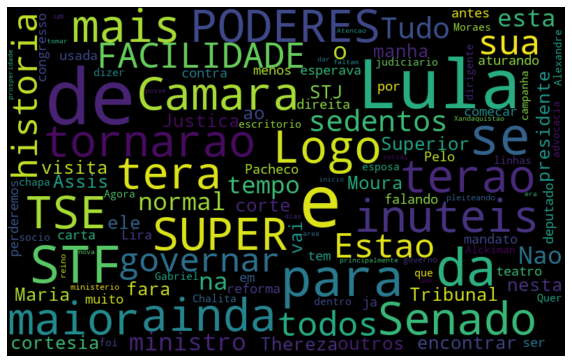

In [101]:
nuvem_palavras_pos()

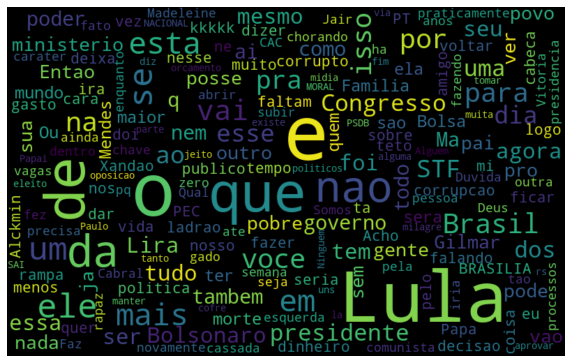

In [102]:
nuvem_palavras_neg()

In [103]:
from nltk import ngrams
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(dados['tweet_text_tratado'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              dados['Sentiment'],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.9583333333333334


In [104]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(dados["tweet_text_tratado"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              dados["Sentiment"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.9583333333333334


In [105]:
from nltk import ngrams
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(dados['TweetText'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              dados['Sentiment'],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.9583333333333334


In [106]:
test = ['o ifal tá me matandoooo', 'tá mto dificil ser feliz no ifal', "O ruim de chegar no ifal essa hora é que você pega os jovens do ensino médio", "hoje o mestre Luís me reconheceu depois de dois anos sem me ver, ele foi o melhor professo que já tive. Filosofia se tornou a minha matéria preferida graças a ele, e sério não sei como a galera do ifal não goSTAVA apenas o maior", "amando os cursinhos que o ifal disponibilizou, cheio de conhecimento e ainda ganha certificado.", "Engenharia nesse ifal é curso de cachorro", "o ifal vai me fazer ter um derrame", "Queria tanto passar o dia no ifal que consegui, apesar do dia corrido", "Todo mundo contente aqui no #IFAL por conta da liberação do terreno para a contruçãoo do nosso campus em murici", "ifal, saudade do que a gente já viveu"]
test_vec = tfidf.transform(test).toarray()
classificacao = [0,0,0,1,1,0,0,1,1,0]
resultado = regressao_logistica.predict(test_vec)
acerto= [classificacao[i] == resultado[i] for i in range(0,10)]
print(acerto)
print(acerto.count(True)/len(acerto))

[True, True, True, False, False, True, True, False, False, True]
0.6


In [107]:
frase_processada = list()
for frase in dados["TweetText"]:
    nova_frase = list()
    frase = frase.lower()
    palavras_texto = token_pontuacao.tokenize(frase)
    for palavra in palavras_texto:
        if palavra not in ['http', 'https']:
          nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

dados['tweet_text_tratado2'] = frase_processada

In [108]:
from nltk import ngrams
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(dados['tweet_text_tratado2'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              dados['Sentiment'],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.9583333333333334


In [109]:
test = ['o ifal tá me matandoooo', 'tá mto dificil ser feliz no ifal', "O ruim de chegar no ifal essa hora é que você pega os jovens do ensino médio", "hoje o mestre Luís me reconheceu depois de dois anos sem me ver, ele foi o melhor professo que já tive. Filosofia se tornou a minha matéria preferida graças a ele, e sério não sei como a galera do ifal não goSTAVA apenas o maior", "amando os cursinhos que o ifal disponibilizou, cheio de conhecimento e ainda ganha certificado.", "Engenharia nesse ifal é curso de cachorro", "o ifal vai me fazer ter um derrame", "Queria tanto passar o dia no ifal que consegui, apesar do dia corrido", "Todo mundo contente aqui no #IFAL por conta da liberação do terreno para a contruçãoo do nosso campus em murici", "ifal, saudade do que a gente já viveu"]
test_vec = tfidf.transform(test).toarray()
classificacao = [0,0,0,1,1,0,0,1,1,0]
resultado = regressao_logistica.predict(test_vec)
acerto= [classificacao[i] == resultado[i] for i in range(0,10)]
print(acerto)
print(acerto.count(True)/len(acerto))

[True, True, True, False, False, True, True, False, False, True]
0.6


In [110]:
todas_palavras = ' '.join([texto for texto in dados.query('Sentiment == 0')["TweetText"]])
frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequência": list(frequencia.values())})

In [111]:
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 50)
df_frequencia

,Palavra,Frequência
38,e,96
2,o,77
3,Lula,57
5,que,48
43,de,46
29,a,42
23,do,40
69,da,26
77,nao,26
47,com,22


In [112]:
test = ['o ifal tá me matandoooo', 'tá mto dificil ser feliz no ifal', "O ruim de chegar no ifal essa hora é que você pega os jovens do ensino médio", "hoje o mestre Luís me reconheceu depois de dois anos sem me ver, ele foi o melhor professo que já tive. Filosofia se tornou a minha matéria preferida graças a ele, e sério não sei como a galera do ifal não goSTAVA apenas o maior", "amando os cursinhos que o ifal disponibilizou, cheio de conhecimento e ainda ganha certificado.", "Engenharia nesse ifal é curso de cachorro", "o ifal vai me fazer ter um derrame", "Queria tanto passar o dia no ifal que consegui, apesar do dia corrido", "Todo mundo contente aqui no #IFAL por conta da liberação do terreno para a contruçãoo do nosso campus em murici", "ifal, saudade do que a gente já viveu"]
test_vec = tfidf.transform(test).toarray()
classificacao = [0,0,0,1,1,0,0,1,1,0]
resultado = regressao_logistica.predict(test_vec)
acerto= [classificacao[i] == resultado[i] for i in range(0,10)]
print(acerto)
print(acerto.count(True)/len(acerto))

[True, True, True, False, False, True, True, False, False, True]
0.6
